In [184]:
# Import các thư viện cần thiết
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
saving_path = r"..\docs"
# Thiết lập kiểu hiển thị cho seaborn
sns.set(style="whitegrid")

In [185]:
# Tải dữ liệu từ file CSV
df = pd.read_csv('../data/external/sentimentdataset.csv')

# Hiển thị 5 dòng đầu tiên để kiểm tra
print("5 dòng đầu tiên của tập dữ liệu:")
display(df.head())

# Kiểm tra thông tin cơ bản của dữ liệu
print("\nThông tin dữ liệu:")
df.info()

# Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

5 dòng đầu tiên của tập dữ liệu:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19



Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB

Số lượng giá trị thiếu trong mỗi cột:
Unnamed: 0.1    0
Unnamed: 0      0
Text  

In [186]:
# Loại bỏ cột không cần thiết
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Chuyển đổi cột Timestamp thành kiểu datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Dữ liệu sau khi làm sạch:")
display(df.head())

Dữ liệu sau khi làm sạch:


,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


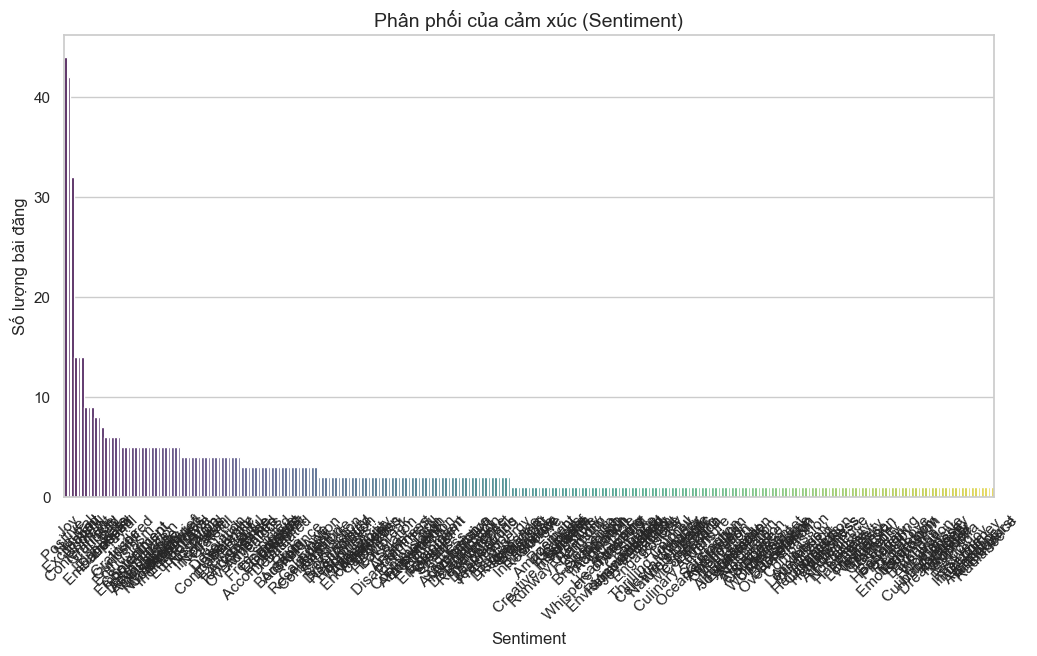

Biểu đồ đã được lưu tại: ..\docs\Phân phối của cảm xúc (Sentiment) theo số lượng bài đăng.png


In [187]:
# Đếm số lượng bài đăng theo Sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Phân phối của cảm xúc (Sentiment)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "Phân phối của cảm xúc (Sentiment) theo số lượng bài đăng.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

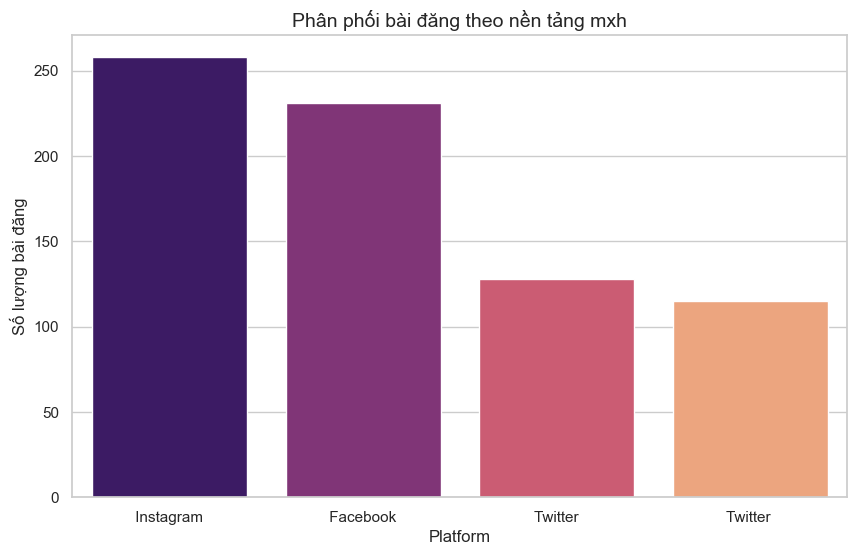

Biểu đồ đã được lưu tại: ..\docs\Phân phối số lượng bài đăng theo nền tảng mxh.png


In [188]:
# Đếm số lượng bài đăng theo Platform
platform_counts = df['Platform'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="magma")
plt.title('Phân phối bài đăng theo nền tảng mxh', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "Phân phối số lượng bài đăng theo nền tảng mxh.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

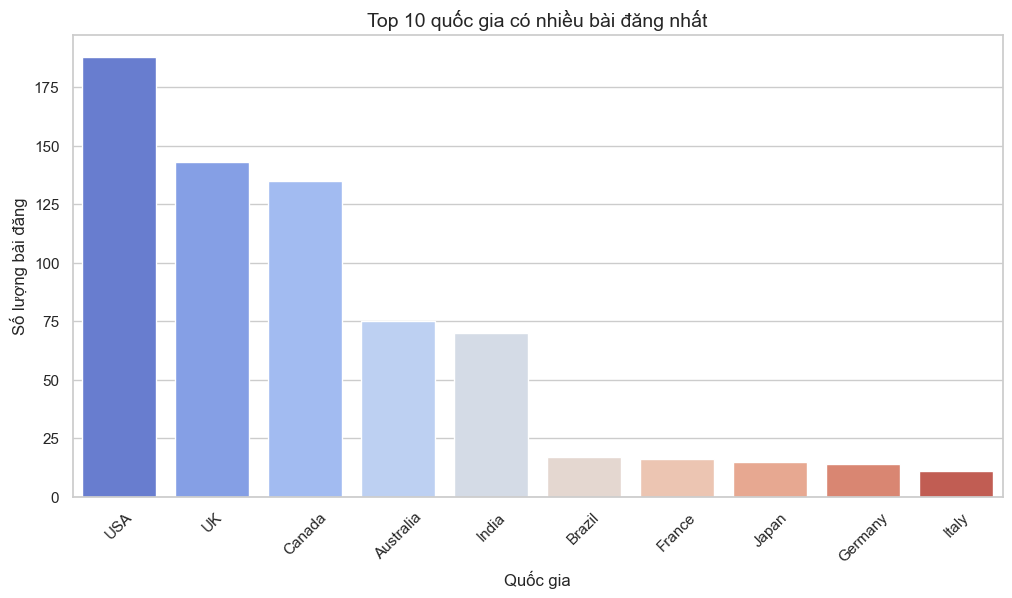

Biểu đồ đã được lưu tại: ..\docs\top 10 quốc gia có nhiều bài đăng nhất.png


In [189]:
# Đếm số lượng bài đăng theo Country (lấy top 10)
df["Country"] = df["Country"].str.strip()
country_counts = df['Country'].value_counts().head(10)
# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title('Top 10 quốc gia có nhiều bài đăng nhất', fontsize=14)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "top 10 quốc gia có nhiều bài đăng nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

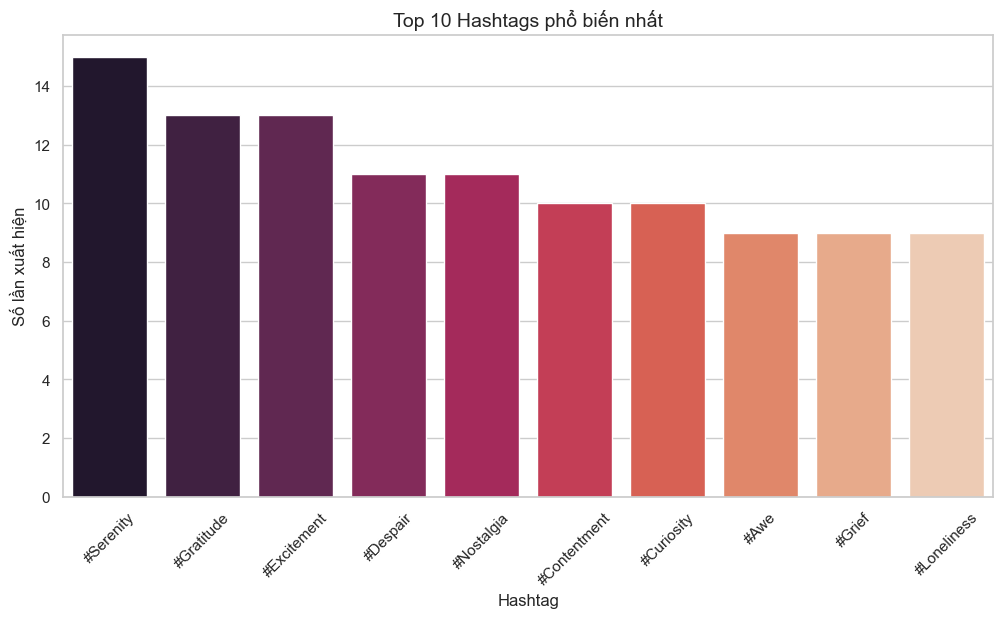

Biểu đồ đã được lưu tại: ..\docs\top 10 hashtags phổ biết nhất.png


In [190]:
# Tách và đếm các hashtag
all_hashtags = df['Hashtags'].str.split().sum()
hashtag_counts = Counter(all_hashtags)
most_common_hashtags = hashtag_counts.most_common(10)

# Chuẩn bị dữ liệu để vẽ biểu đồ
hashtags, counts = zip(*most_common_hashtags)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=list(hashtags), y=list(counts), palette="rocket")
plt.title('Top 10 Hashtags phổ biến nhất', fontsize=14)
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Số lần xuất hiện', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "top 10 hashtags phổ biết nhất.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

Thống kê cơ bản cho Retweets và Likes:


,Retweets,Likes
count,732.000000,732.000000
mean,21.508197,42.901639
std,7.061286,14.089848
min,5.000000,10.000000
25%,17.750000,34.750000
50%,22.000000,43.000000
75%,25.000000,50.000000
max,40.000000,80.000000


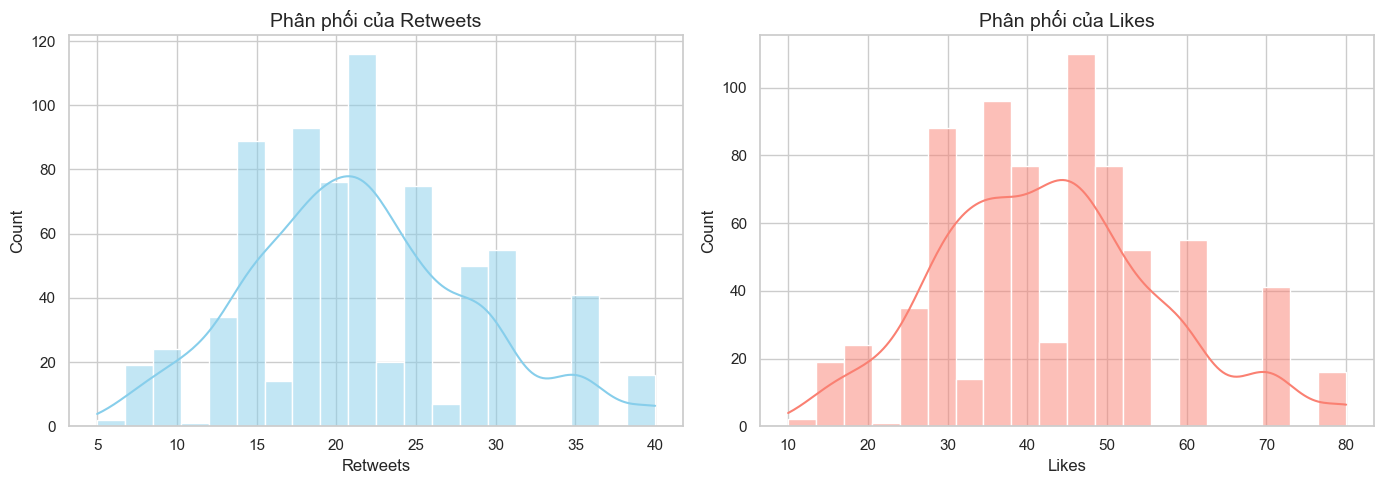

Biểu đồ đã được lưu tại: ..\docs\Phân phối lượt chia sẻ và lượt thích.png


In [191]:
# Thống kê cơ bản
print("Thống kê cơ bản cho Retweets và Likes:")
display(df[['Retweets', 'Likes']].describe())

# Vẽ histogram
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Retweets'], bins=20, kde=True, color='skyblue')
plt.title('Phân phối của Retweets', fontsize=14)

plt.subplot(1, 2, 2)
sns.histplot(df['Likes'], bins=20, kde=True, color='salmon')
plt.title('Phân phối của Likes', fontsize=14)

plt.tight_layout()
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "Phân phối lượt chia sẻ và lượt thích.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

Số lượng dòng dữ liệu: 732
         Retweets       Likes
count  732.000000  732.000000
mean    21.508197   42.901639
std      7.061286   14.089848
min      5.000000   10.000000
25%     17.750000   34.750000
50%     22.000000   43.000000
75%     25.000000   50.000000
max     40.000000   80.000000


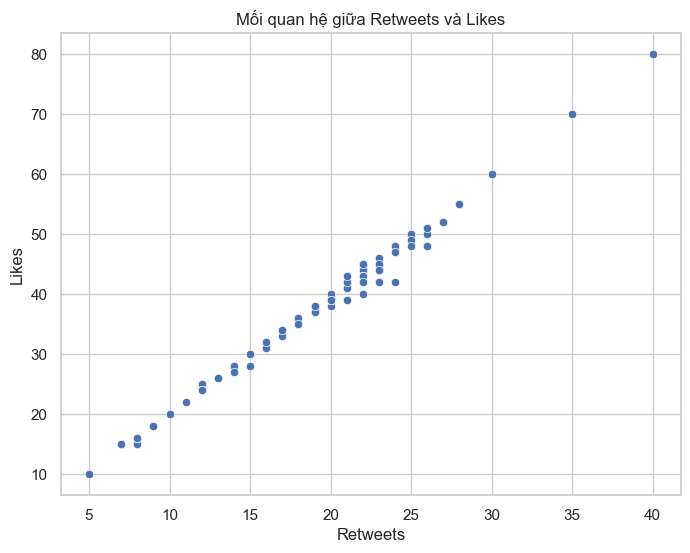

Biểu đồ đã được lưu tại: ..\docs\mối quan hệ giờ lượt chia sẻ và lượt thích.png
Hệ số tương quan Pearson: 0.9985
Giá trị p: 0.0000


In [192]:
# Kiểm tra số lượng dữ liệu
print(f"Số lượng dòng dữ liệu: {len(df)}")

# Kiểm tra phân phối của Retweets và Likes
print(df[['Retweets', 'Likes']].describe())

# Vẽ scatter plot để xem mối quan hệ
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Retweets', y='Likes', data=df)
plt.title('Mối quan hệ giữa Retweets và Likes')
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "mối quan hệ giờ lượt chia sẻ và lượt thích.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

# Kiểm tra tương quan Pearson chi tiết
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['Retweets'], df['Likes'])
print(f"Hệ số tương quan Pearson: {correlation:.4f}")
print(f"Giá trị p: {p_value:.4f}")

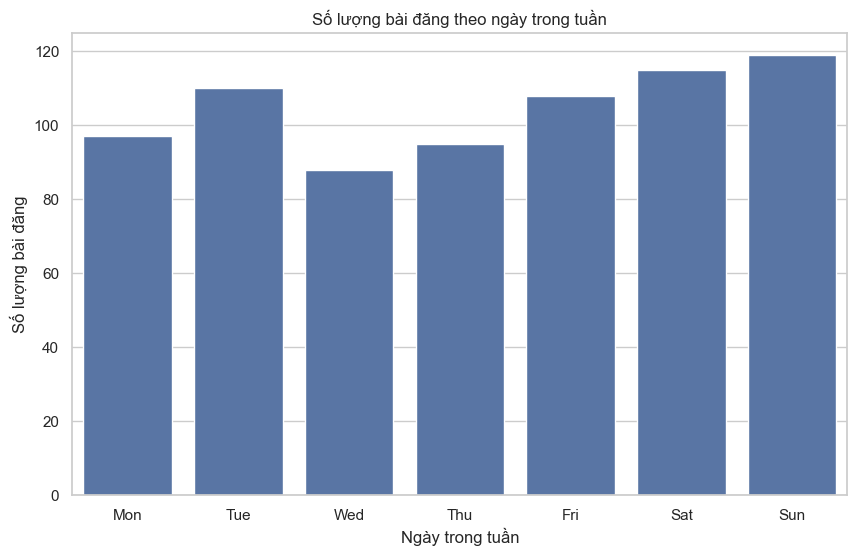

Biểu đồ đã được lưu tại: ..\docs\số lượng bài đăng theo ngày trong tuần.png


In [193]:
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
posts_per_day = df['DayOfWeek'].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10,6))
sns.barplot(x=days, y=posts_per_day.values)
plt.title('Số lượng bài đăng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng bài đăng')
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo ngày trong tuần.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

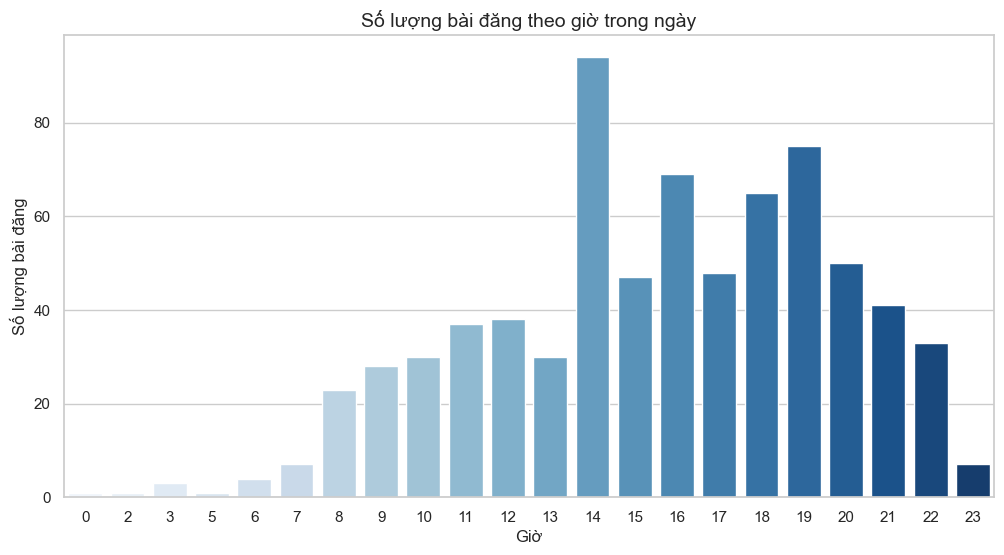

Biểu đồ đã được lưu tại: ..\docs\số lượng bài đăng theo giờ trong ngày.png


In [194]:
# Tạo cột Date từ Timestamp
df['Date'] = df['Timestamp'].dt.date

# Đếm số bài đăng theo ngày
posts_per_day = df.groupby('Date').size()
# Đếm số bài đăng theo giờ
df['Hour'] = df['Timestamp'].dt.hour
posts_per_hour = df.groupby('Hour').size()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_per_hour.index, y=posts_per_hour.values, palette="Blues")
plt.title('Số lượng bài đăng theo giờ trong ngày', fontsize=14)
plt.xlabel('Giờ', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng theo giờ trong ngày.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

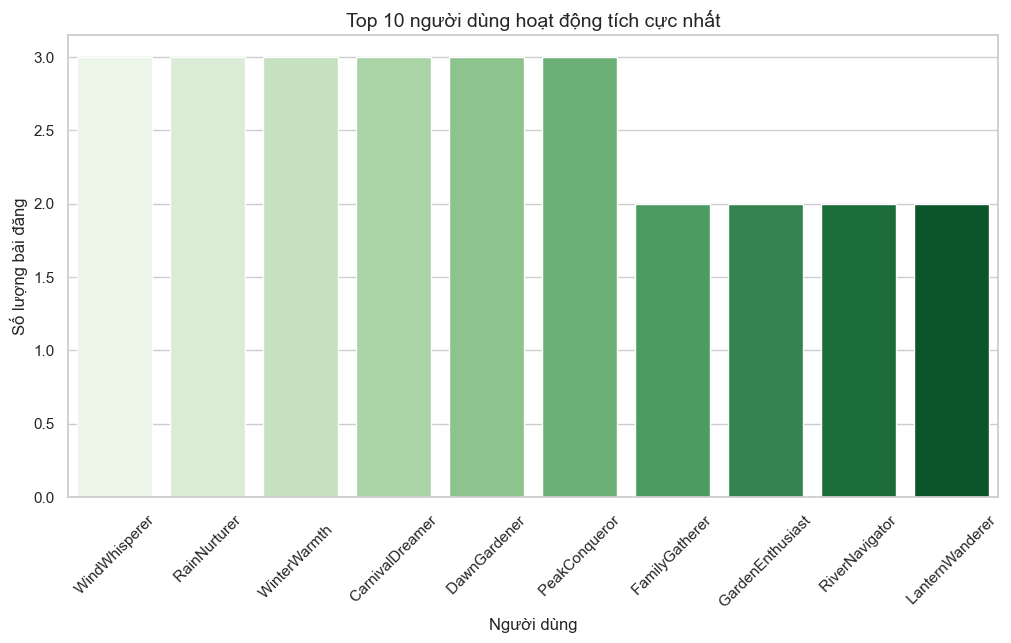

Biểu đồ đã được lưu tại: ..\docs\top 10 người dùng hoạt động tích cực nhất


In [195]:
# Đếm số bài đăng theo User
user_counts = df['User'].value_counts().head(10)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x=user_counts.index, y=user_counts.values, palette="Greens")
plt.title('Top 10 người dùng hoạt động tích cực nhất', fontsize=14)
plt.xlabel('Người dùng', fontsize=12)
plt.ylabel('Số lượng bài đăng', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "top 10 người dùng hoạt động tích cực nhất")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

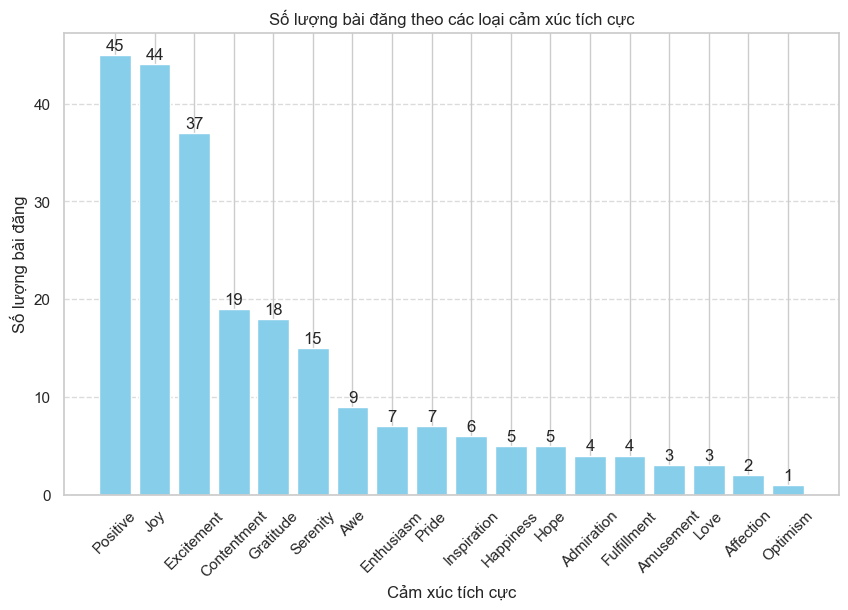

Biểu đồ đã được lưu tại: ..\docs\số lượng bài đăng phân phối theo cảm xúc tích cực.png


In [208]:
# Làm sạch dữ liệu cột Sentiment
df['Sentiment'] = df['Sentiment'].str.strip()
# Sau đó thực hiện lọc với danh sách ban đầu
#positive_sentiments = ['Positive', 'Happiness', 'Joy', 'Enjoyment', 'Admiration', 'Affection', 'Awe', 'Love', 'Amusement']
positive_sentiments = [
    'Positive',        # Tích cực
    'Happiness',       # Hạnh phúc
    'Joy',             # Vui vẻ
    'Love',            # Tình yêu
    'Gratitude',       # Biết ơn
    'Excitement',      # Hào hứng
    'Pride',           # Tự hào
    'Contentment',     # Hài lòng
    'Hope',            # Hy vọng
    'Amusement',       # Vui nhộn
    'Awe',             # Kinh ngạc
    'Serenity',        # Thanh thản
    'Inspiration',     # Truyền cảm hứng
    'Admiration',      # Ngưỡng mộ
    'Optimism',        # Lạc quan
    'Affection',       # Tình cảm
    'Enthusiasm',      # Nhiệt tình
    'Fulfillment',     # Thỏa mãn
    'Bliss'            # Hạnh phúc tột độ
]
positive_df = df[df['Sentiment'].isin(positive_sentiments)]

# Đếm số lượng bài đăng cho từng loại cảm xúc tích cực
positive_counts = positive_df['Sentiment'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))  # Đặt kích thước biểu đồ
plt.bar(positive_counts.index, positive_counts.values, color='skyblue')  # Vẽ các cột với màu xanh nhạt

# Thêm nhãn và tiêu đề
plt.xlabel('Cảm xúc tích cực')  # Nhãn trục x
plt.ylabel('Số lượng bài đăng')  # Nhãn trục y
plt.title('Số lượng bài đăng theo các loại cảm xúc tích cực')  # Tiêu đề biểu đồ

# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=45)

# Thêm giá trị lên đầu mỗi cột
for i, value in enumerate(positive_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center')  # Hiển thị số lượng trên mỗi cột

# Thêm lưới cho trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng phân phối theo cảm xúc tích cực.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

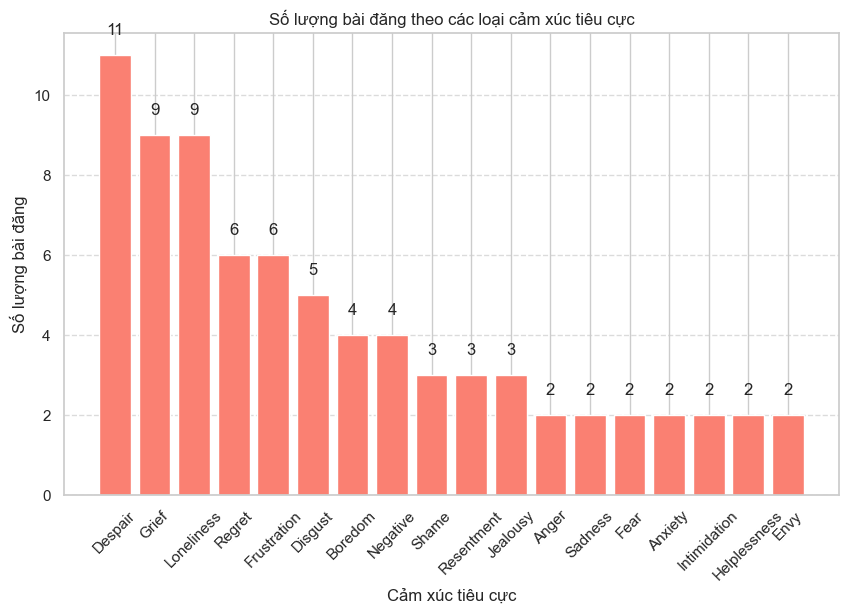

Biểu đồ đã được lưu tại: ..\docs\số lượng bài đăng phân phối theo cảm xúc tiêu cực.png


In [209]:
# Làm sạch dữ liệu cột Sentiment
df['Sentiment'] = df['Sentiment'].str.strip()

# Danh sách cảm xúc tiêu cực
negative_sentiments = [
    'Negative',       # Tiêu cực
    'Sadness',        # Buồn bã
    'Anger',          # Tức giận
    'Fear',           # Sợ hãi
    'Disgust',        # Ghê tởm
    'Shame',          # Xấu hổ
    'Guilt',          # Tội lỗi
    'Embarrassment',  # Bối rối
    'Jealousy',       # Ghen tị
    'Resentment',     # Oán giận
    'Frustration',    # Bực bội
    'Boredom',        # Chán nản
    'Anxiety',        # Lo lắng
    'Intimidation',   # Đe dọa
    'Helplessness',   # Bất lực
    'Envy',           # Đố kỵ
    'Regret',         # Hối tiếc
    'Despair',        # Tuyệt vọng
    'Grief',          # Đau buồn
    'Loneliness'      # Cô đơn
]
# Lọc các bài đăng có cảm xúc tiêu cực
negative_df = df[df['Sentiment'].isin(negative_sentiments)]

# Đếm số lượng bài đăng cho từng loại cảm xúc tiêu cực
negative_counts = negative_df['Sentiment'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))  # Đặt kích thước biểu đồ
plt.bar(negative_counts.index, negative_counts.values, color='salmon')  # Vẽ các cột với màu đỏ nhạt

# Thêm nhãn và tiêu đề
plt.xlabel('Cảm xúc tiêu cực')  # Nhãn trục x
plt.ylabel('Số lượng bài đăng')  # Nhãn trục y
plt.title('Số lượng bài đăng theo các loại cảm xúc tiêu cực')  # Tiêu đề biểu đồ

# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=45)

# Thêm giá trị lên đầu mỗi cột
for i, value in enumerate(negative_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center')  # Hiển thị số lượng trên mỗi cột

# Thêm lưới cho trục y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "số lượng bài đăng phân phối theo cảm xúc tiêu cực.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

In [197]:
# Sắp xếp theo Likes và lấy top 10
top_posts = df.sort_values(by='Likes', ascending=False).head(10)

print("Top 10 bài đăng có nhiều lượt thích nhất:")
display(top_posts[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])# Sắp xếp theo Likes và lấy top 10
top_posts = df.sort_values(by='Likes', ascending=False).head(10)

print("Top 10 bài đăng có nhiều lượt thích nhất:")
display(top_posts[['Text', 'Likes', 'Retweets', 'Sentiment', 'Platform']])

Top 10 bài đăng có nhiều lượt thích nhất:


,Text,Likes,Retweets,Sentiment,Platform
481,"Surrounded by the colors of joy, a canvas pain...",80.0,40.0,Joy,Instagram
530,"Captivated by the spellbinding plot twists, th...",80.0,40.0,Excitement,Twitter
382,A sense of wonder at the vastness of the cosmo...,80.0,40.0,Wonder,Instagram
560,"In the serene beauty of a sunset, nature unfol...",80.0,40.0,Tranquility,Instagram
470,"Dancing on sunshine, each step a celebration o...",80.0,40.0,Joy,Instagram
550,"After a series of defeats, the soccer team fac...",80.0,40.0,Disappointment,Twitter
368,Elation over discovering a rare book in a quai...,80.0,40.0,Elation,Instagram
540,Celebrating a historic victory in the World Cu...,80.0,40.0,Joy,Instagram
355,Anticipation for an upcoming adventure in an e...,80.0,40.0,Anticipation,Twitter
570,"Underneath the city lights, the dancer express...",80.0,40.0,Mesmerizing,Twitter


Top 10 bài đăng có nhiều lượt thích nhất:


,Text,Likes,Retweets,Sentiment,Platform
481,"Surrounded by the colors of joy, a canvas pain...",80.0,40.0,Joy,Instagram
530,"Captivated by the spellbinding plot twists, th...",80.0,40.0,Excitement,Twitter
382,A sense of wonder at the vastness of the cosmo...,80.0,40.0,Wonder,Instagram
560,"In the serene beauty of a sunset, nature unfol...",80.0,40.0,Tranquility,Instagram
470,"Dancing on sunshine, each step a celebration o...",80.0,40.0,Joy,Instagram
550,"After a series of defeats, the soccer team fac...",80.0,40.0,Disappointment,Twitter
368,Elation over discovering a rare book in a quai...,80.0,40.0,Elation,Instagram
540,Celebrating a historic victory in the World Cu...,80.0,40.0,Joy,Instagram
355,Anticipation for an upcoming adventure in an e...,80.0,40.0,Anticipation,Twitter
570,"Underneath the city lights, the dancer express...",80.0,40.0,Mesmerizing,Twitter


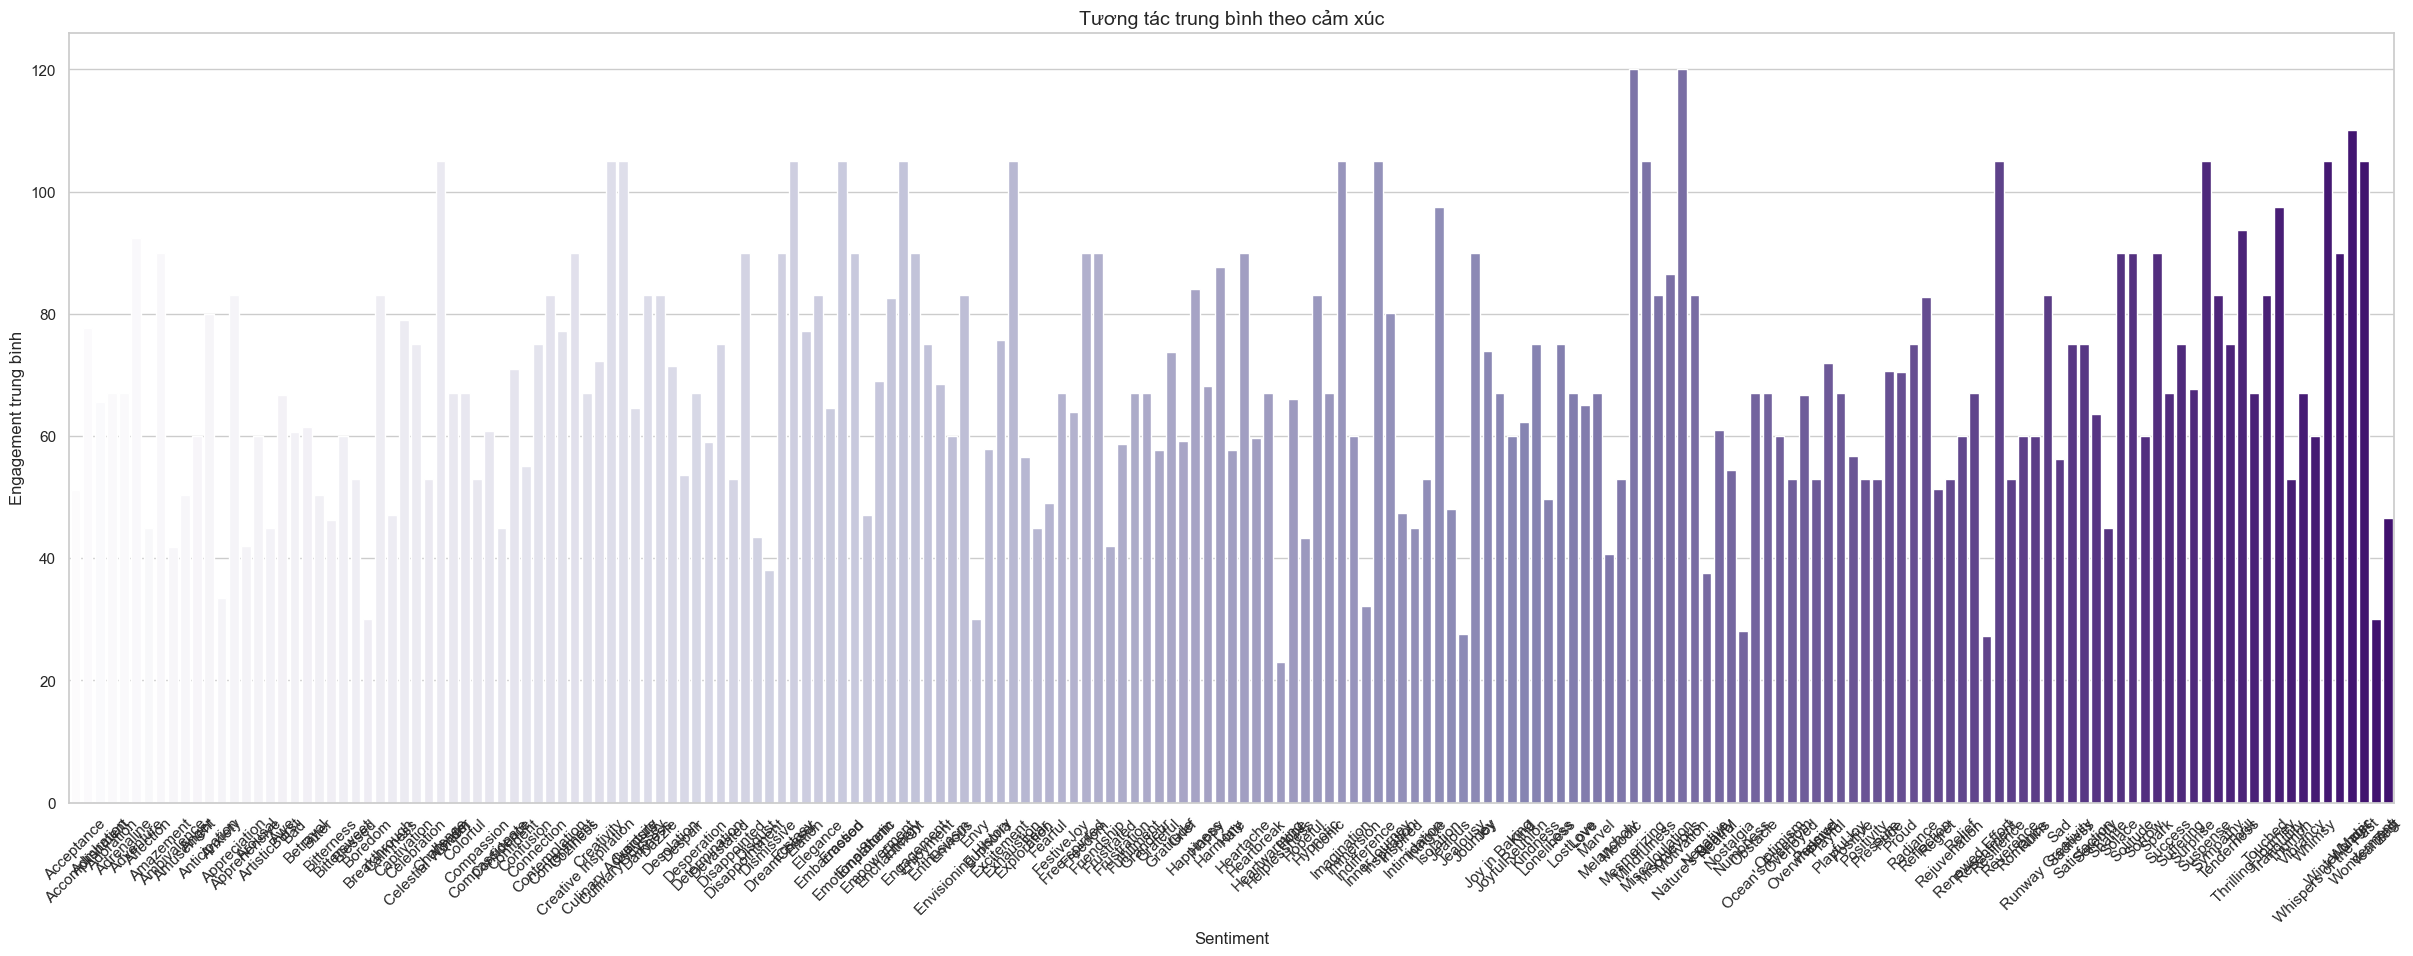

Biểu đồ đã được lưu tại: ..\docs\tương tác trung biình dựa theo cảm xúc.png


In [198]:
# Tạo cột Engagement
df['Engagement'] = df['Retweets'] + df['Likes']

# Engagement trung bình theo Sentiment
engagement_by_sentiment = df.groupby('Sentiment')['Engagement'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(30, 10))
sns.barplot(x=engagement_by_sentiment.index, y=engagement_by_sentiment.values, palette="Purples")
plt.title('Tương tác trung bình theo cảm xúc', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Engagement trung bình', fontsize=12)
plt.xticks(rotation=45)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "tương tác trung biình dựa theo cảm xúc.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

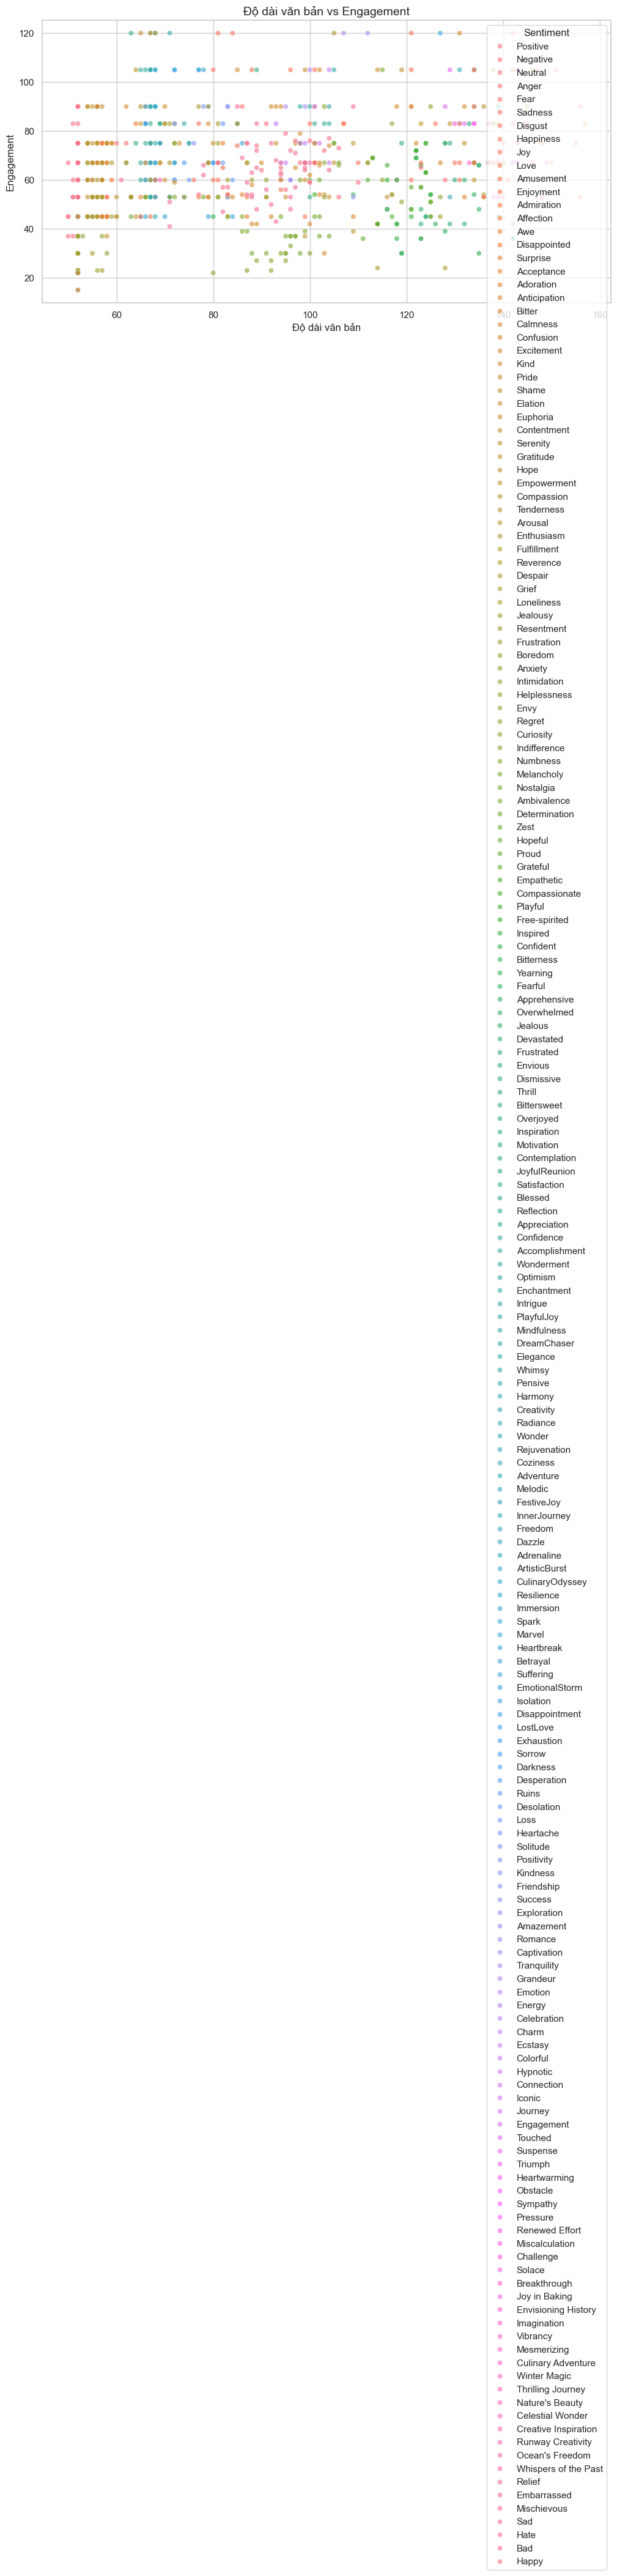

Biểu đồ đã được lưu tại: ..\docs\trương tác trung bình với độ dài văn bản.png
Tương quan giữa Text_Length và Engagement:
             Text_Length  Engagement
Text_Length     1.000000    0.187565
Engagement      0.187565    1.000000


In [199]:
# Tạo cột Text_Length
df['Text_Length'] = df['Text'].str.len()

# Vẽ scatter plot giữa Text_Length và Engagement
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Text_Length', y='Engagement', data=df, hue='Sentiment', alpha=0.6)
plt.title('Độ dài văn bản vs Engagement', fontsize=14)
plt.xlabel('Độ dài văn bản', fontsize=12)
plt.ylabel('Engagement', fontsize=12)
# Đường dẫn file ảnh đầy đủ
file_name = os.path.join(saving_path, "trương tác trung bình với độ dài văn bản.png")

# Lưu biểu đồ
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()
print(f"Biểu đồ đã được lưu tại: {file_name}")

# Tính tương quan
print("Tương quan giữa Text_Length và Engagement:")
print(df[['Text_Length', 'Engagement']].corr())

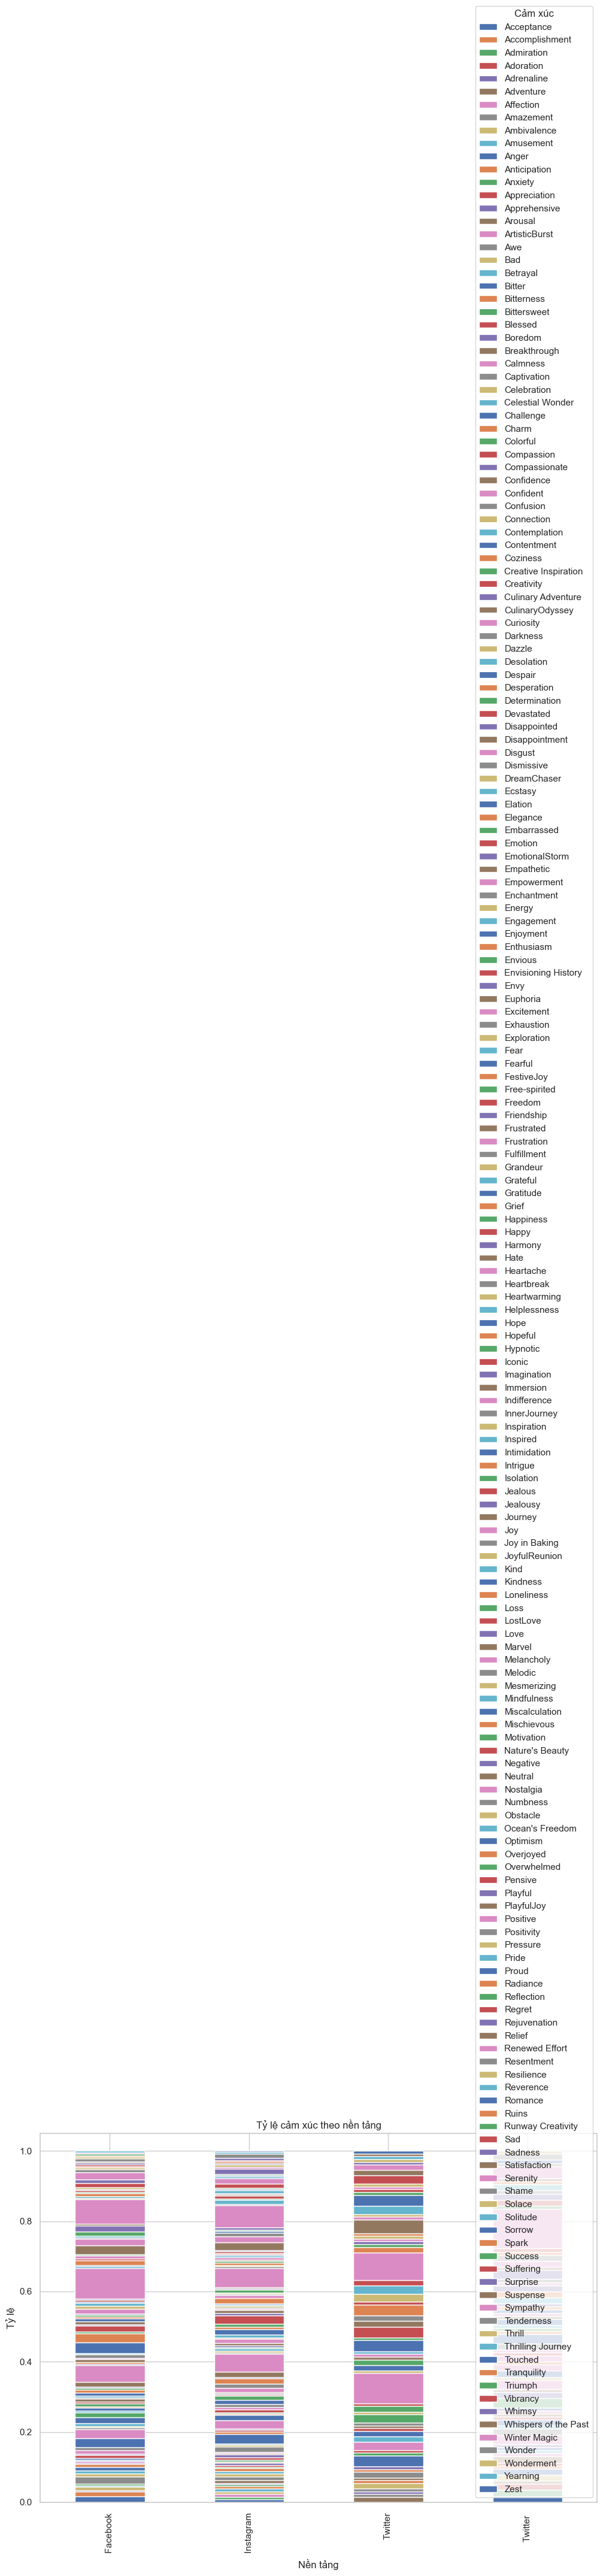

In [200]:
     # Xem nội dung của counts
counts = df.groupby(['Platform', 'Sentiment']).size().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Tỷ lệ cảm xúc theo nền tảng')
plt.xlabel('Nền tảng')
plt.ylabel('Tỷ lệ')
plt.legend(title='Cảm xúc')
plt.show()